# Exercise 12: Deterministic Finite Automaton

Let us write an interpreter for RegExp using a Deterministic Finite Automaton (DFA) evaluator.

The regular expression ```(ab*a)*``` has the following DFA representation:

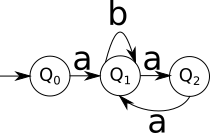

It should match "" "aa" "aba" "abba" "aaaa", "ababa"... But not "a" "aaa" "ab"...

We will represented the DFA with a dictionnary, where the key correspond to a state, and the value is the transition function.

In [ ]:
dfa_aba = { 0: {'a': 1},
            1: {'a': 2, 'b': 1},
            2: {'a': 1}}

You should implement the ```execute_dfa``` function.
- ```dfa``` is the representation of the DFA using the dictionnary structure from above
- ```final``` is the list of state
- ```s``` is the string to match

In [ ]:
def execute_dfa(dfa, final, s):
    pass


The ```create_regexp_executor``` create a function that takes a string and execute the given the DFA:

In [ ]:
def create_regexp_executor(dfa, final):
    def apply(s):
        return execute_dfa(dfa, final, s)
    return apply

Test the ```(ab*a)*``` executor:

In [ ]:
aba_regexp = create_regexp_executor(dfa_aba, [0, 2])

In [ ]:
assert(aba_regexp("") == True)
assert(aba_regexp("aa") == True)
assert(aba_regexp("aba") == True)
assert(aba_regexp("abbbbba") == True)
assert(aba_regexp("aaaa") == True)
assert(aba_regexp("aaaba") == True)
assert(aba_regexp("aaabbba") == True)
assert(aba_regexp("abbbaabbba") == True)


In [ ]:
assert(aba_regexp("c") == False)
assert(aba_regexp("a") == False)
assert(aba_regexp("ab") == False)
assert(aba_regexp("abbbbb") == False)
assert(aba_regexp("aaa") == False)
assert(aba_regexp("aaab") == False)
assert(aba_regexp("aaabbb") == False)
assert(aba_regexp("abbbaabbb") == False)


Check for validity of a personnumber: ```[0-9]{2}(0[1-9]|10|11|12)([0-2][0-9]|30|31)-[0-9]{4}```:

In [ ]:
{**{0:1}, **{1:0}}

In [ ]:
def create_0_9(state):
    return {'0': state, '1': state, '2': state, '3': state, '4': state, '5': state, '6': state, '7': state, '8': state, '9': state}
def create_1_9(state):
    return { '1': state, '2': state, '3': state, '4': state, '5': state, '6': state, '7': state, '8': state, '9': state}

In [ ]:
dfa_pnd = {
    0: create_0_9(1),
    1: create_0_9(2),
    2: { '0': 3, '1': 4},
    3: create_1_9(5),
    4: { '0': 3, '1': 4, '2': 5},
    5: { '0': 6, '1': 6, '2': 6, '3': 7},
    6: create_1_9(8),
    7: { '0': 8, '1': 8},
    8: { '-': 9},
    9: create_0_9(10),
    10: create_0_9(11),
    11: create_0_9(12),
    12: create_0_9(13),
    13: {}
}

In [ ]:
pnd_regexp = create_regexp_executor(dfa_pnd, [13])

In [ ]:
assert(pnd_regexp("890527-1234") == True)
assert(pnd_regexp("891206-5321") == True)
assert(pnd_regexp("090206-6674") == True)

In [ ]:
assert(pnd_regexp("891151-4124") == False)
assert(pnd_regexp("891524-1231") == False)